In [63]:
import pandas as pd
flight_data = pd.read_csv('Clean_Dataset.csv')
flight_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Dropping unnecessary features

In [64]:
flight_data = flight_data.drop(['Unnamed: 0'], axis=1)
flight_data = flight_data.drop(['flight'], axis=1)
flight_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Exploring dataframe

In [65]:
flight_data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [66]:
flight_data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [67]:
flight_data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [68]:
flight_data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [69]:
flight_data.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [70]:
flight_data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [71]:
flight_data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [72]:
flight_data.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [73]:
flight_data.duration.min()

0.83

In [74]:
flight_data.duration.max()

49.83

In [75]:
flight_data.duration.median()

11.25

## Preprocessing

In [76]:
flight_data['class'] = flight_data['class'].apply(lambda x: 1 if x == 'Business' else 0)
flight_data.stops = pd.factorize(flight_data.stops)[0]
flight_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [77]:
flight_data = flight_data.join(pd.get_dummies(flight_data['airline'], prefix='airline')).drop(['airline'], axis=1)
flight_data = flight_data.join(pd.get_dummies(flight_data['source_city'], prefix='source')).drop(['source_city'], axis=1)
flight_data = flight_data.join(pd.get_dummies(flight_data['departure_time'], prefix='departure')).drop(['departure_time'], axis=1)
flight_data = flight_data.join(pd.get_dummies(flight_data['arrival_time'], prefix='arrival')).drop(['arrival_time'], axis=1)
flight_data = flight_data.join(pd.get_dummies(flight_data['destination_city'], prefix='dest')).drop(['destination_city'], axis=1)

In [78]:
flight_data

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


## Training regression model 

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = flight_data.drop('price', axis=1), flight_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.984996392614129

## Evaluating the model

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = model.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))
print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.984996392614129
MAE Score:  1076.7626821691367
MSE Score:  7734093.647003528
RMSE Score:  2781.0238486937733


Text(0.5, 1.0, 'Actual Flight Price vs Predicted Flight Price')

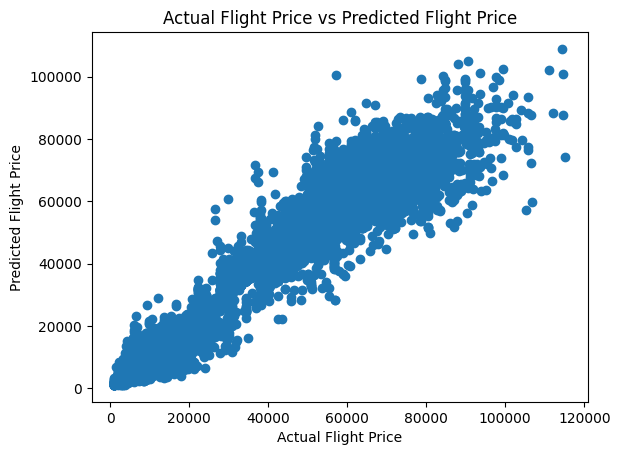

In [82]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual Flight Price vs Predicted Flight Price')

In [91]:
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8798058564393281),
 ('duration', 0.05783856682541052),
 ('days_left', 0.018480416735854988),
 ('airline_Air_India', 0.0060739748225292255),
 ('airline_Vistara', 0.003872845357466515),
 ('source_Delhi', 0.003692737597627495),
 ('dest_Delhi', 0.0034475419139885465),
 ('source_Mumbai', 0.0022814975153678946),
 ('dest_Mumbai', 0.0019197275717853881),
 ('stops', 0.001901320447010847),
 ('dest_Kolkata', 0.001787037023651665),
 ('source_Kolkata', 0.0017145244609225088),
 ('arrival_Evening', 0.0015323833099875632),
 ('dest_Hyderabad', 0.0015090965514231005),
 ('dest_Bangalore', 0.00131272474768676),
 ('source_Hyderabad', 0.0012679500727931147),
 ('arrival_Night', 0.001145478895270959),
 ('source_Bangalore', 0.0010870886257795663),
 ('departure_Evening', 0.0010708896931150677),
 ('arrival_Afternoon', 0.0009722323645073556),
 ('source_Chennai', 0.0008735615091501422),
 ('departure_Morning', 0.0008654830748779143),
 ('dest_Chennai', 0.0008349768670499638),
 ('departure_Afternoon', 0.